In [2]:
import os
import math
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg","pdf")
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

from tqdm.notebook import tqdm

In [3]:
import torch
print("Using torch",torch.__version__)

Using torch 1.7.1+cpu


In [9]:
torch.manual_seed(42)      

In [10]:
x = torch.Tensor(2,3,4)
print(x)
print(x.shape)
# tensor 생성시에 random값으로 생성

tensor([[[9.2755e-39, 1.0561e-38, 5.9694e-39, 1.0010e-38],
         [1.0102e-38, 1.0561e-38, 1.0469e-38, 1.0653e-38],
         [1.0469e-38, 8.9082e-39, 8.9082e-39, 1.0194e-38]],

        [[9.1837e-39, 4.6837e-39, 6.9796e-39, 9.0000e-39],
         [1.0561e-38, 1.0653e-38, 4.1327e-39, 8.9082e-39],
         [9.8265e-39, 9.4592e-39, 1.0561e-38, 1.0653e-38]]])
torch.Size([2, 3, 4])


In [11]:
x = torch.Tensor([[1,2],[3,4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [12]:
x = torch.rand(2,3,4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [13]:
shape = x.shape
print("shape:",x.shape)

size = x.size()
print("size:",size)

dim1,dim2,dim3 = x.size()
print("size:", dim1,dim2,dim3)

shape: torch.Size([2, 3, 4])
size: torch.Size([2, 3, 4])
size: 2 3 4


In [14]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)

y = x1+x2
print(x1,x2,y)

tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]]) tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]]) tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [15]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)
x3 = torch.tensor([[1,2,3],[4,5,6]])

print("x1:(before):",x1)
print("x2:(before):",x2)
print("x3:(before):",x3)


x2.add_(x1)
x3.add(x1)
print("x1:(after):",x1)  
print("x2:(after):",x2)
print("x3:(after):",x3)

#x2.add(x1)이라는 명령어는 오류는 안나오는데 실질적으로 기능을 못하는 명령어



x1:(before): tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
x2:(before): tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
x3:(before): tensor([[1, 2, 3],
        [4, 5, 6]])
x1:(after): tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
x2:(after): tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])
x3:(after): tensor([[1, 2, 3],
        [4, 5, 6]])


In [16]:
x = torch.arange(6)
print("x:",x)

x: tensor([0, 1, 2, 3, 4, 5])


In [17]:
x = x.view(2,3)
print("x:",x)

x: tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
x = x.permute(1,0) #swaapping dimension 0 and 1 #  차원 축을 바꿔줌
print("X:",x)

X: tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [19]:
x = torch.arange(6)
x = x.view(2,3)
print(x)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [20]:
w = torch.arange(9).view(3,3)
print(w)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [21]:
h = torch.matmul(x,w) # 일반적인 행렬곱
print(h)

tensor([[15, 18, 21],
        [42, 54, 66]])


In [22]:
x = torch.arange(12).view(3,4)
print("x",x)

x tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [23]:
print(x[1,:]) , print(x[1]) # 1행 출력
print(x[:,1]) # 1열 출력

tensor([4, 5, 6, 7])
tensor([4, 5, 6, 7])
tensor([1, 5, 9])


In [24]:
print(x[1:3,2:])

tensor([[ 6,  7],
        [10, 11]])


In [25]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [26]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [27]:
x = torch.randn(3,dtype=torch.float32,requires_grad=True)
print(x)

tensor([0.2815, 0.0562, 0.5227], requires_grad=True)


In [28]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()
print(y)


tensor(8.2657, grad_fn=<MeanBackward0>)


In [29]:
y.grad_fn

In [30]:
y.backward()

In [31]:
print(x.grad)

tensor([1.5210, 1.3708, 1.6818])


In [32]:
gpu_avail = torch.cuda.is_available()
print(gpu_avail)

False


In [33]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [34]:
x = torch.zeros(2,3)
x = x.to(device)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [35]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [36]:
###pytorch Part 2

In [37]:
import torch.nn as nn
import torch.nn.functional as F

In [38]:
class Mymodule(nn.Module):

    def __init__(self):
        super.__init__()
        #some init for my module
    
    def forward(self,x):
        pass
        #Function for performing the calculation of the module
        
    #def backward()
    #backward의 경우에는 자동으로 실행되고, 필요에 따라 내가 직접 정의할 수 있음.

In [39]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden,num_outputs):
        super().__init__()
        # Initialize the module we need to build the network
        self.linear1 = nn.Linear(num_inputs,num_hidden)
        # input을 받아주는 layer
        self.act_func = nn.Tanh()
        # activation 함수 ## 근데 activation layer의 노드 수가 4개인데 이거는 설정을 어떻게 하는거지?
                            ## 이건은 num_hidden이 결정하는 것!
                            ## hidden Layer의 수가 여럿인데, 노드 수를 다르게 하고 싶을땐 어카지?
        self.linear2 = nn.Linear(num_inputs,num_hidden)
        # output

    def forward(self,x):
        # perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_func(x)
        x = self.linear2(x)

        # x에 대한 식을 한줄로 써도 문제는 없지만 보기 불편하고, 이해하기 어려울 수 있으므로, 이렇게 쓰는게 나음

        return x        

In [40]:
model = SimpleClassifier(num_inputs=2,num_hidden=4,num_outputs=1)
# printing a module shows all its submodule
# submodule이 전부 나타나게 하려면 어떻게 해야하는걸까? transformer 만들때는 망했는데 흑흑
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_func): Tanh()
  (linear2): Linear(in_features=2, out_features=4, bias=True)
)


In [41]:
for name,param in model.named_parameters():
    print("parameter %s, shape %s" % (name, str(param.shape)))
    #   %s는 .format이랑 비슷한 기능해줌.

parameter linear1.weight, shape torch.Size([4, 2])
parameter linear1.bias, shape torch.Size([4])
parameter linear2.weight, shape torch.Size([4, 2])
parameter linear2.bias, shape torch.Size([4])


In [42]:
import torch.utils.data as data

In [43]:
data.Dataset

torch.utils.data.dataset.Dataset

In [44]:
x = torch.randint(low = 0, high = 2,size =(3,2))
print(x)
print(x.sum(dim = 1)) # 행끼리의 합
# print(x.sum(dim = 0)) # 열끼리의 합

# print(x.to(torch.long)) # datatype을 변경해주는 작업

print(x.sum(dim = 1) == 1)# 행의 sum이 1이냐?
(x.sum(dim = 1) == 1).to(torch.long)

tensor([[0, 1],
        [0, 1],
        [0, 0]])
tensor([1, 1, 0])
tensor([ True,  True, False])


tensor([1, 1, 0])

In [60]:
data = torch.randint(low = 0,high = 2,size = (10,2),dtype = torch.float32)
label = (data.sum(dim = 1) == 1 ).to(torch.long)
label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [45]:
class XORDataset(data.Dataset): #data.Dataset를 상속받음
    def __init__(self,size,std = 0.1):
        """
            inputs :
                size - Number of data points we want to generate
                std - Standard deviation of the noise ( see generate_continuous_xor function)
    
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):

        # Each data point int he XOR dataset has two variables, x and y, that can be either 0 or 1
        # the label is their XOR combination, i.e. 1 if iobly x or only y is 1 while the other is 0
        # if x = y, the label is 0

        data = torch.randint(low = 0,high = 2,size = (self.size,2),dtype = torch.float32)
        label = (data.sum(dim = 1) == 1 ).to(torch.long)
        # data.sum(dim = 1) == 1 : xor을 boolen값으로 나타내는 작업
        # label 설계 : data를 열끼리 더한 값이 boolen형태의 값으로 출력이 되면, 그것을 숫자형으로 바꿔서 0 or 1로 나타나게 만든다.
        # size는 내가 입력한 size * 2 짜리 matrix가 된다.

        # To make it slightly more challenging, we add a bit of gaussian noise to the data points

        data += self.std * torch.randn(data.shape)
        # XOR data에 분산을 적용시켜준다.
        # 아마도 이건 요소별 곱이겠지?

        self.data =  data
        self.label = label
    
    def __len__(self):

        # number of data point we have. alternatively self.data.shaoe[0], or self.label.shape[0]

        return self.size

    def __getitem__(self,idx):
        
        # index를 사용할 수 있도록 해주는 내장함수!
        # 이거 없으면 index 사용이 안된다.

        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point , data_label



In [46]:
dataset = XORDataset(size = 200)
print("size of data:",len(dataset))

dataset[0]

size of data: 200


(tensor([ 0.8353, -0.1036]), tensor(1))

In [47]:
x = dataset[:][0][0:,0]
y = dataset[:][0][0:,1]
# dataset.data

label = dataset[:][1]
# dataset.label

In [48]:
dataset.data.cpu().numpy()
# https://byeongjo-kim.tistory.com/32
# .cpu()는 gpu에 있는 데이터를 cpu로 복사해서 가져오는것을 이야기한다.


array([[ 8.35295916e-01, -1.03620984e-01],
       [ 9.02892530e-01,  1.28605056e+00],
       [ 9.00589883e-01,  9.64098334e-01],
       [ 8.99906576e-01,  9.93690014e-01],
       [ 1.03830314e+00,  9.95523036e-01],
       [ 7.68804610e-01,  9.35843885e-01],
       [ 1.10530210e+00,  1.44950733e-01],
       [ 9.52833220e-02,  1.11890674e+00],
       [ 8.71773839e-01,  1.19652927e+00],
       [ 8.82342160e-01,  1.11888504e+00],
       [ 1.02155542e+00,  1.06264603e+00],
       [ 1.09143531e+00,  1.00950442e-01],
       [ 9.66110170e-01,  5.17973378e-02],
       [ 8.25407028e-01,  1.10963869e+00],
       [ 4.86561917e-02,  1.03668249e+00],
       [-3.91183011e-02,  1.01698542e+00],
       [ 9.27479863e-01, -9.52773318e-02],
       [ 9.15721178e-01, -1.64126843e-01],
       [ 9.28190589e-01, -1.08956499e-02],
       [-1.82996616e-01,  1.03647089e+00],
       [ 8.08474302e-01, -6.42175302e-02],
       [ 9.32474852e-01,  9.18960214e-01],
       [ 9.16703522e-01,  1.82964563e-01],
       [ 7.

In [49]:
def visualize_sample(data,label):
    if isinstance(data,torch.Tensor):
        # isinstance(data,dtype) -> 가져온 데이터 타입이 입력학 dtype과 같으면 True, 아니면 False
        # GPU로 부터 tensor를 가져와서 CPU에 복사한 뒤에, numpy로 변환한다.
        data = data.cpu().numpy()
    
    if isinstance(label,torch.Tensor):
        label = label.cpu().numpy()
    
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label = "Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label = "Class 1")    

    plt.title("Dataset_samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()




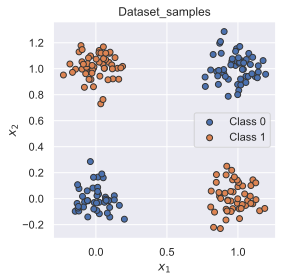

In [50]:
visualize_sample(dataset.data,dataset.label)

In [51]:
data_loader = data.DataLoader(dataset,batch_size = 8 , shuffle = True)

# https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

# DataLoader라는 것이 무엇인고!

In [52]:
next(iter((i**2 for i in [1,2,3,4])))

1

In [53]:
data_loader = data.DataLoader(dataset,batch_size = 8 , shuffle = True)
# shuffle = True면 학습할 때 들어가는 data batch 순서가 랜덤하게 들어가는거고 False면 앞에서 부터 순서대로 들어가는거임

data_inputs , data_labels = next(iter(data_loader))

# dataloader에서 처음으로 나오는 값을 확인

print("Data inputs", data_inputs.shape,"\n",data_inputs)
print("Data labels", data_labels.shape,"\n",data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0212,  0.0816],
        [ 0.0537,  1.0782],
        [-0.1049,  1.1782],
        [-0.0482,  0.9184],
        [ 0.0898, -0.0154],
        [ 0.0078,  0.0224],
        [-0.0944,  0.0173],
        [ 1.0035,  1.0842]])
Data labels torch.Size([8]) 
 tensor([0, 1, 1, 1, 0, 0, 0, 0])


In [54]:
#optimizer

"""
1. get a batch from the data loader
2. obtain the predictions from the model for the batch
3. calculate the loss based on the difference between predictions and labels
4. backpropagation calculate the gradients for every parameter with respect to the loss
5. update the parameters of the model in the direction of the gradients


"""

'\n1. get a batch from the data loader\n2. obtain the predictions from the model for the batch\n3. calculate the loss based on the difference between predictions and labels\n4. backpropagation calculate the gradients for every parameter with respect to the loss\n5. update the parameters of the model in the direction of the gradients\n\n\n'

In [55]:
loss_module = nn.BCEWithLogitsLoss()

In [56]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [57]:
train_dataset = XORDataset(size = 1000)
train_dataset_loader = data.DataLoader(train_dataset,batch_size=120,shuffle=True)

In [58]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_func): Tanh()
  (linear2): Linear(in_features=2, out_features=4, bias=True)
)

In [ ]:
  def train_model(model,optimizer,data_loader,loss_module,num_epoch = 100):
      # set model to train mode
      model.train() # model은 train mode가 있고 evaluate mode 가 있다는데 무슨소린지 잘 모르겠음.

      for epoch in tqdm(range(num_epoch)):
          for data_inputs, data_labels in data_loader: